In [62]:
# Print your Emory ID here
print("Emory ID: 2551008")

Emory ID: 2551008


In [63]:
# Import the necessary libraries and load the data
import pandas as pd
df = pd.read_csv("passwords.csv")

1. An online password attack is when someone tries to hack your account by simply trying a very large number of username/password combinations to access your account. For each `password` in our dataset, the `value` column shows the amount of time it is estimated to take an “online password attack” to hack your account. The column `time_unit` shows the units of that time value (e.g., hours, days, years, etc.). It would be much nicer if our values were of the same units so we can more easily compare the “online password guessing time” for each password. So your first task is to convert all of the values to units of hours (assume the conversion units provided below, e.g., 1 day is 24 hours, 1 week is 168 hours, etc).

In [64]:
# Your answer here 

units = {
    "seconds": 1 / 3600,
    "minutes": 1 / 60,
    "days": 24,
    "weeks": 168,
    "months": 720,
    "years": 8760,
}

df['value_hours'] = df.apply(lambda row: row['value'] * units.get(row['time_unit'], 1), axis=1)

2. Are there any missing values in the dataset? If so, how many? After you have counted the, please drop them from the dataset.

In [65]:
# Your answer here

missing_values = df.isna().sum()
print("Missing values per column:", missing_values)
df = df.dropna()

Missing values per column: rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
value_hours          7
dtype: int64


3. Which password category has the highest average strength?


In [82]:
# Your answer here
df['strength'] = pd.to_numeric(df['strength'])
average_strength = df.groupby('category')['strength'].mean().sort_values(ascending=False)
print("Highest average strength by category:", average_strength.head(1))


Highest average strength by category: category
nerdy-pop    14.0
Name: strength, dtype: float64


4. What is the rank of the password 'qwerty'?

In [67]:
# Your answer here
qwerty_rank = df.loc[df['password'] == 'qwerty', 'rank'].iloc[0]
print("Rank of 'qwerty':", qwerty_rank)


Rank of 'qwerty': 5.0


5. How many passwords have more than 8 characters?

In [68]:
# Your answer here
count = df[df['password'].str.len() > 8].shape[0]
print("Passwords with more than 8 characters:", count)


Passwords with more than 8 characters: 1


6. How many passwords do not contain a number?

In [69]:
# Your answer here
num_count = df[~df['password'].str.contains(r'\d')].shape[0]
print("Passwords without a number:", num_count)


Passwords without a number: 446


7. What is the average time in hours needed to crack these passwords that begin with `123`? How does this compare to the average of all passwords in the dataset?

In [70]:
# Your answer here
passwords_123 = df[df['password'].str.startswith('123')]
average_123_time = passwords_123['value_hours'].mean()
overall_average_time = df['value_hours'].mean()

print("Average time for passwords starting with '123':", average_123_time)
print("Overall average cracking time:", overall_average_time)


Average time for passwords starting with '123': 107.30332438271606
Overall average cracking time: 13917.565247227776


8. What percentage of passwords are of the `simple-alphanumeric` category?

In [71]:
# Your answer here
alphanumeric = df[df['category'] == 'simple-alphanumeric'].shape[0]
total_passwords = df.shape[0]
percentage_simple_alphanumeric = (alphanumeric / total_passwords) * 100
print("Percentage of simple-alphanumeric passwords:", percentage_simple_alphanumeric)


Percentage of simple-alphanumeric passwords: 12.2


9. How many passwords have a strength rating below 5? What is their percentage?

In [72]:
# Your answer here
below_5 = df[df['strength'] < 5].shape[0]
below_5_percentage = ( below_5/ total_passwords) * 100
print("Passwords with strength below 5:", below_5)
print("Percentage:", below_5_percentage)



Passwords with strength below 5: 73
Percentage: 14.6


10. What is the most common password in the dataset?

In [83]:
sorted_df = df.sort_values(by='rank', ascending=True)
password = sorted_df.iloc[0]['password']
print("Most common password:", password)

Most common password: password


In [73]:
# Your answer here

sorted_df = df.sort_values(by='rank', ascending=True)
password = sorted_df.iloc[0]['password']
print("Most common password:", password)

Most common password: password


11. How many unique passwords are there in each category, and what is their average length?

In [74]:
# Your answer here
category_stats = df.groupby('category').agg(
    UniquePasswords=('password', 'nunique'),
    AvgLength=('password', lambda x: x.str.len().mean())
)
print(category_stats)



                     UniquePasswords  AvgLength
category                                       
animal                            29   6.206897
cool-macho                        79   6.253165
fluffy                            44   5.795455
food                              11   6.090909
name                             183   6.218579
nerdy-pop                         30   6.633333
password-related                  15   6.333333
rebellious-rude                   11   6.363636
simple-alphanumeric               61   5.934426
sport                             37   6.513514


12. What is the median rank and strength for passwords of each length?

In [75]:
# Your answer here
df['length'] = df['password'].str.len()
median_stats = df.groupby('length').agg(
    MedianRank=('rank', 'median'),
    MedianStrength=('strength', 'median')
)
print(median_stats)


        MedianRank  MedianStrength
length                            
4            326.0             6.0
5            343.0             7.0
6            231.0             7.0
7            222.0             8.0
8            286.0             8.0
9             49.0             4.0


13. Add a column `strength_label` with values `weak` if strength is below 5, else `strong`. Use a lambda function.

In [76]:
# Your answer here
df['strength_label'] = df['strength'].apply(lambda x: 'weak' if x < 5 else 'strong')
print(df[['password', 'strength', 'strength_label']].head())


   password  strength strength_label
0  password       8.0         strong
1    123456       4.0           weak
2  12345678       4.0           weak
3      1234       4.0           weak
4    qwerty       8.0         strong


14. Create a column `high_value` with a value of `True` if value is in the top 10% of values in the dataset.

In [77]:
# Your answer here
threshold = df['value'].quantile(0.9)
df['high_value'] = df['value'] >= threshold
print(df[['password', 'value', 'high_value']].head())


   password  value  high_value
0  password   6.91       False
1    123456  18.52        True
2  12345678   1.29       False
3      1234  11.11        True
4    qwerty   3.72       False


15. Join all passwords within each `category` into a single string.

In [78]:
# Your answer here
passwords_joined = df.groupby('category')['password'].apply(lambda x: ' '.join(x))
print(passwords_joined)


category
animal                 dragon monkey bigdog falcon phoenix tigers chi...
cool-macho             mustang shadow master harley hunter ranger bus...
fluffy                 love sunshine silver orange ginger summer prin...
food                   pepper cheese coffee banana butter muffin hotd...
name                   michael jennifer jordan superman thomas tigger...
nerdy-pop              starwars computer merlin matrix snoopy boomer ...
password-related       password letmein test pass access gateway plea...
rebellious-rude        biteme freedom secret whatever badboy sexsex b...
simple-alphanumeric    123456 12345678 1234 qwerty 12345 696969 abc12...
sport                  baseball football soccer hockey dallas yankees...
Name: password, dtype: object


**Bonus question 01**: What is the correlation between password length and strength? Create a scatter plot with regression line.

Correlation between password length and strength: 0.26198240672041384


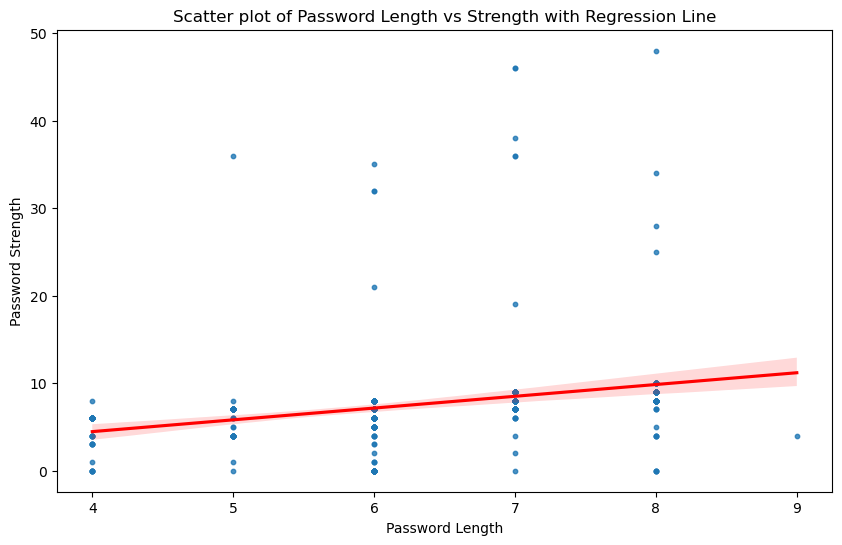

In [85]:
# Your answer here
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation
correlation = df['length'].corr(df['strength'])
print("Correlation between password length and strength:", correlation)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='length', y='strength', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Scatter plot of Password Length vs Strength with Regression Line')
plt.xlabel('Password Length')
plt.ylabel('Password Strength')
plt.show()

**Bonus question 02**: Find all passwords with palindromes.

In [80]:
# Your answer here
palindromes = df[df['password'] == df['password'].apply(lambda x: x[::-1])]
print("Palindromic passwords:\n", palindromes[['password']])


Palindromic passwords:
      password
18     111111
59     666666
76       1111
105    aaaaaa
144    xxxxxx
190    hannah
192  11111111
206   7777777
277    222222
285  xxxxxxxx
286    777777
291  88888888
314      2112
324      7777
352    zzzzzz
364    555555
371      2222
373      4444
409     11111
413    123321
420    999999
458    333333
472      xxxx
489    888888
